In [640]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [641]:
#df = pd.read_csv('/Users/yuhongwu/Desktop/Master_SEM2/Data Science for Finance/project/Daegu_Real_Estate_data.csv')
df = pd.read_csv('Daegu_Real_Estate_data.csv')

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [643]:
df.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [644]:
#change categorical value to numeric value.
subway_mapping = {'0-5min': 4, '5min~10min': 3, '10min~15min': 2, '15min~20min': 1, 'no_bus_stop_nearby': 0}
bus_mapping = {'0~5min': 2, '5min~10min': 1, '10min~15min': 0}

df['TimeToSubway'] = df['TimeToSubway'].map(subway_mapping)
df['TimeToBusStop'] = df['TimeToBusStop'].map(bus_mapping)

<AxesSubplot:>

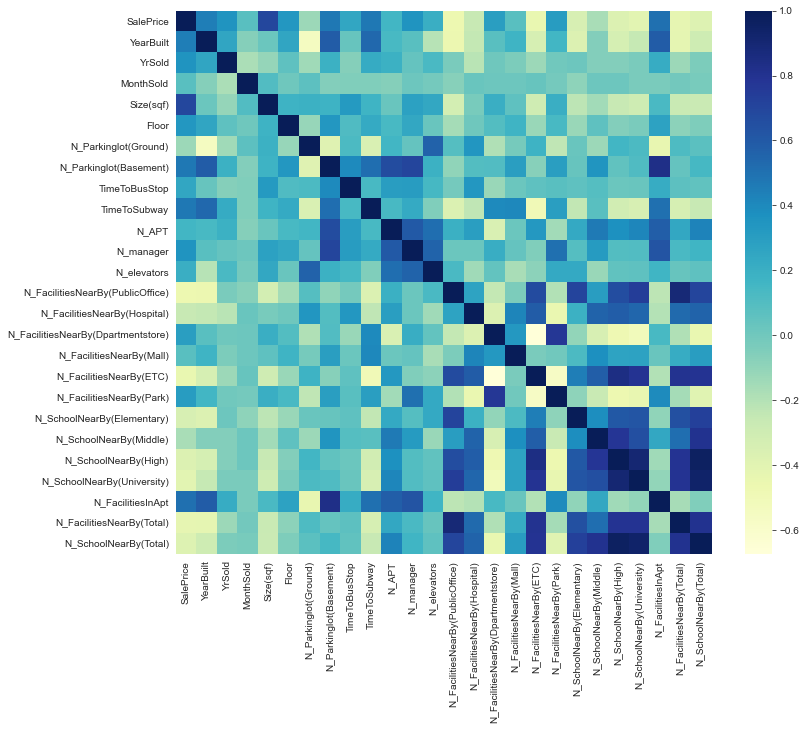

In [645]:
#heat map - correlation
fig, ax = plt.subplots(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [646]:
# correlations with sales price
corr.iloc[0]

SalePrice                             1.000000
YearBuilt                             0.447875
YrSold                                0.357682
MonthSold                             0.081924
Size(sqf)                             0.697199
Floor                                 0.336729
N_Parkinglot(Ground)                 -0.130549
N_Parkinglot(Basement)                0.473252
TimeToBusStop                         0.252062
TimeToSubway                          0.473886
N_APT                                 0.162684
N_manager                             0.358329
N_elevators                           0.208248
N_FacilitiesNearBy(PublicOffice)     -0.462234
N_FacilitiesNearBy(Hospital)         -0.257282
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Mall)              0.082979
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesNearBy(Park)              0.310906
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(Middle)               -0.166439
N_SchoolNearB

In [647]:
# select numeric features
features = df.dtypes[df.dtypes != "object"].index

# make new dataframe
df = df[features]
df.shape

(5891, 26)

In [648]:
np.mean(df['SalePrice'])/40000

5.530452813613987

In [649]:
#standardized X
from sklearn import preprocessing

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

In [650]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [651]:
# test the fitness of linear regression using numerical dataset
from sklearn import linear_model

# fit linear model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
coef = lr.coef_
lr.coef_

array([ 14738.23205949,  34189.27676717,   7541.02200033,  63467.15844623,
         8195.34362488,  -5026.28793257,  13636.25579998,   8034.62867824,
         9484.67331661, -26940.50190258,  -6655.16086884,  24820.15811252,
       -22053.10239306,  -2268.35971166,  39779.34239159, -17175.77298963,
        21950.03113441, -28650.389844  ,  -9748.78866437,  -2480.76053437,
         1352.08635641,  10808.53151781,  28964.57910619,   4111.23826911,
         1423.9461417 ])

In [652]:
coef_df = pd.Series(coef, index=df.columns[1:])

Text(0.5, 0, 'Coefficient')

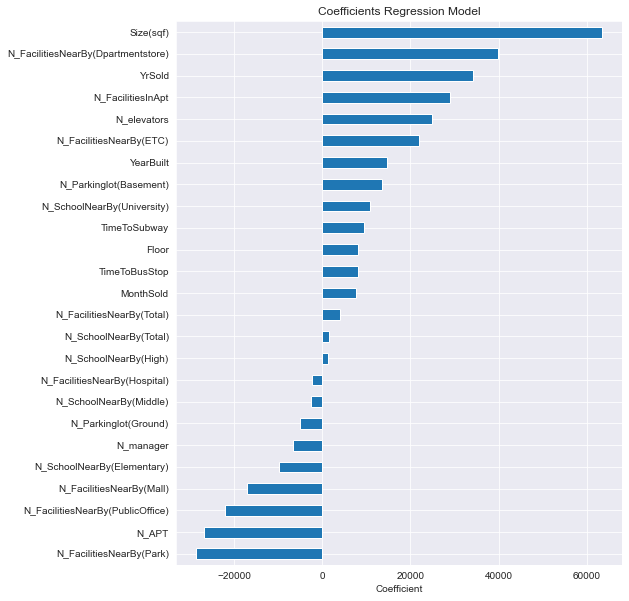

In [653]:
#plot coefficients
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model")
plt.xlabel("Coefficient")

In [654]:
#RMSE - test
print ("Root Mean squared error : %.3f" %(np.mean((lr.predict(X_test) - y_test)**2))**0.5)
print('too large RMSE, may due to too many outliers in data')

Root Mean squared error : 39276.833
too large RMSE, may due to too many outliers in data


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      5891.000000
mean     221218.112545
std      106384.186446
min       32743.000000
25%      144247.000000
50%      207964.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

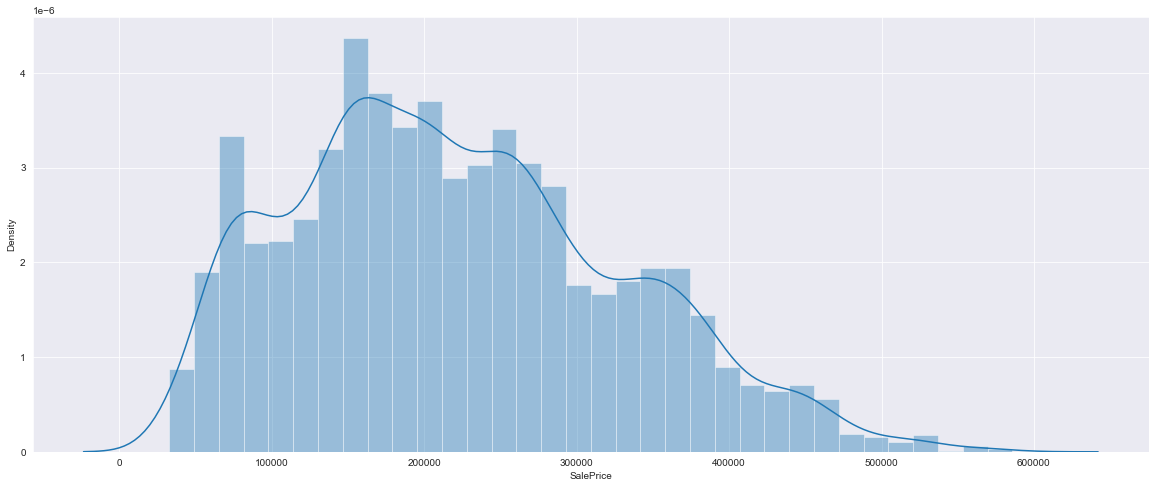

In [655]:
#deal with outliers
plt.figure(figsize=(20,8))
sns.distplot(df['SalePrice'])
df['SalePrice'].describe()

<AxesSubplot:ylabel='SalePrice'>

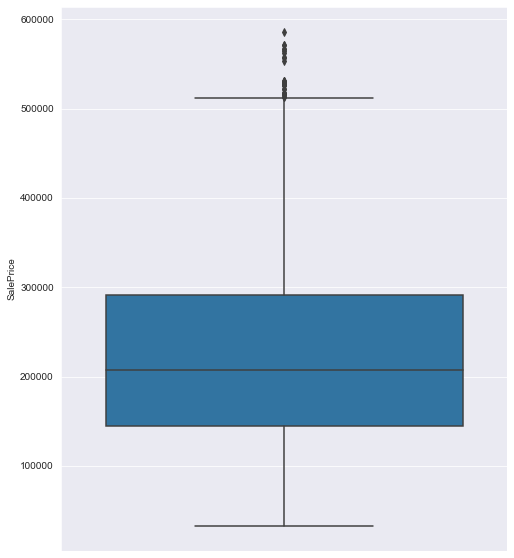

In [656]:
sns.boxplot(y=df['SalePrice'])

In [657]:
print('boxplot tells me price over about $510000 are outliers.')

boxplot tells me price over about $510000 are outliers.


In [658]:
#drop outliers >510000
adj_df = df.drop(df.loc[df['SalePrice']>510000].index, axis=0)

In [659]:
# refit linear model
X = adj_df.iloc[:, 1:].values
y = adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[1:])

In [660]:
print ("Root Mean squared error : %.2f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)

Root Mean squared error : 38922.84


In [661]:
print('result slightly better')

result slightly better


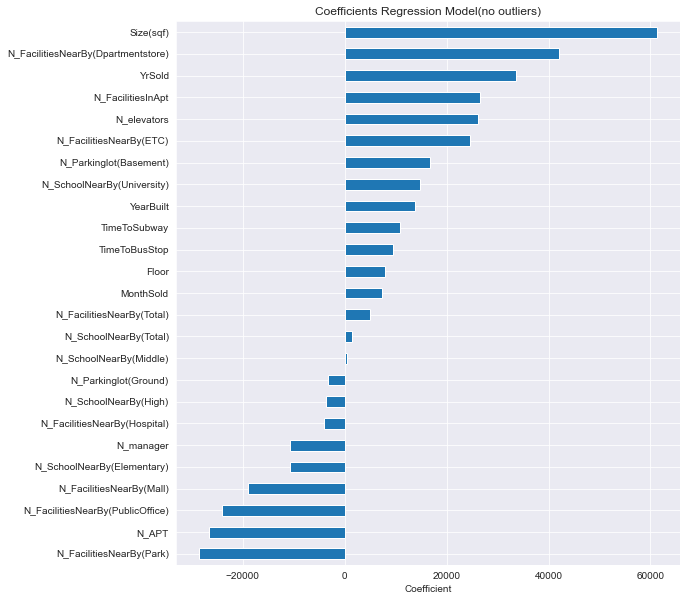

In [662]:
# compare coefficients - no outliers
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

plt.subplots_adjust(wspace=1, right=1)

In [663]:
#delete some features have low coefficient.
adj_df.drop(['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(High)',
             'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(Total)', 'N_Parkinglot(Ground)','MonthSold'], axis=1, inplace=True)

<AxesSubplot:xlabel='N_elevators', ylabel='N_APT'>

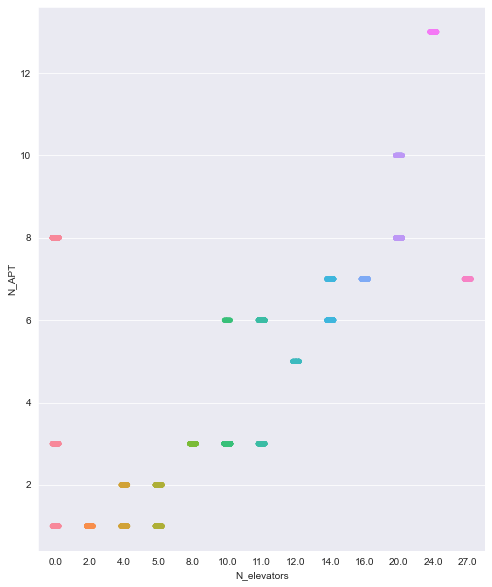

In [664]:
#We believe that the more people stay in apartments, the more elevators are needed.
#So these two variables may have high correlations
sns.stripplot(x='N_elevators', y='N_APT', data=adj_df)

<AxesSubplot:xlabel='N_Parkinglot(Basement)', ylabel='N_APT'>

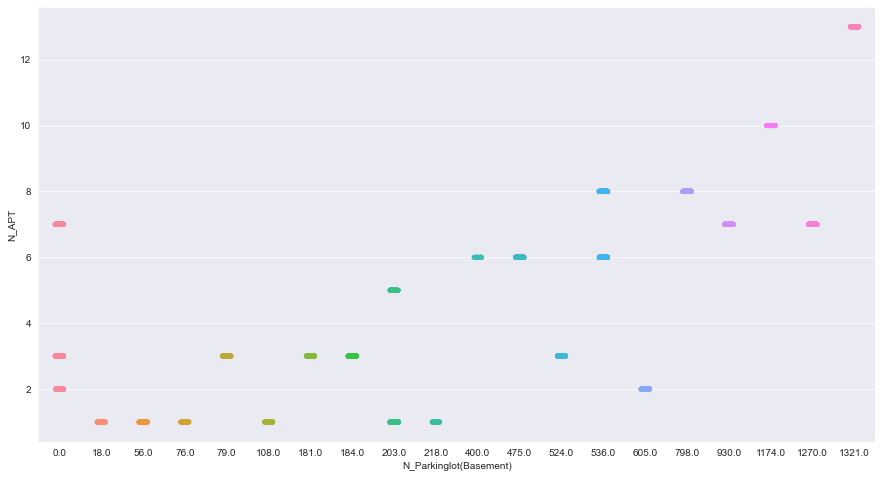

In [665]:
#Also, we think number of parking spaces and number of apartments may have linear relation
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x='N_Parkinglot(Basement)', y='N_APT', data=adj_df)

In [666]:
# delete more features
adj_df.drop(['N_elevators', 'N_Parkinglot(Basement)'], axis=1, inplace=True)

In [667]:
# fit again
X = adj_df.iloc[:, 1:].values
y = adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[1:])

In [668]:
#RMSE - fit again - test
print ("Root Mean squared error : %.3f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)

Root Mean squared error : 40863.309


In [669]:
# worse result, now optimization
from sklearn import ensemble

X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
rmse = mean_squared_error(y_test, clf.predict(X_test))**0.5
print("RMSE: %.3f" % rmse)

RMSE: 19119.874


Text(0, 0.5, 'Loss')

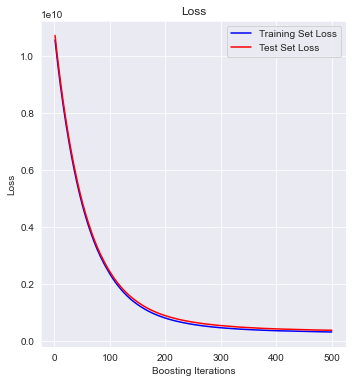

In [670]:
# Plot loss
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Loss')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Loss')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss')

In [671]:
adj_df.reset_index(drop=True, inplace=True)

y_new = adj_df['SalePrice']

In [672]:
y_new

0       141592
1        51327
2        48672
3       380530
4       221238
         ...  
5851    482300
5852    298230
5853    357522
5854    312389
5855    393805
Name: SalePrice, Length: 5856, dtype: int64

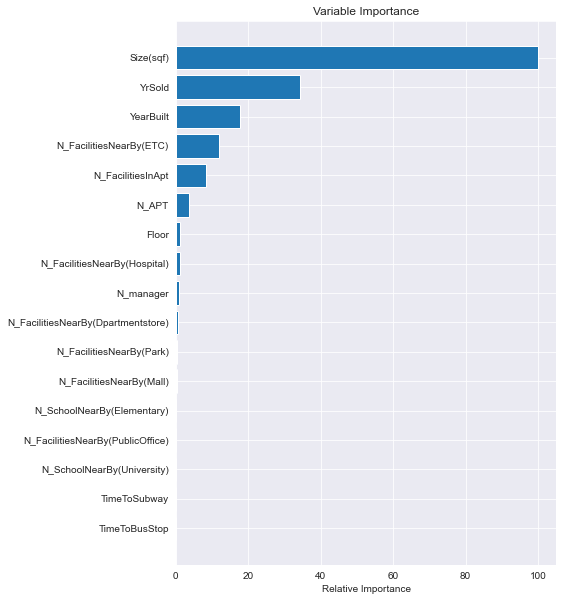

In [673]:
 # Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 2)

# exclude target variable in data frame
adj_df.drop('SalePrice', axis=1, inplace=True)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, adj_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [674]:
#select most important variables
print("the most important variables are Size(sqf), YrSold, YearBuilt, N_FacilitiesNearBy(ETC), N_FacilitiesInApt, N_APT")

the most important variables are Size(sqf), YrSold, YearBuilt, N_FacilitiesNearBy(ETC), N_FacilitiesInApt, N_APT


In [675]:
X_new = adj_df[['Size(sqf)', 'YrSold', 'YearBuilt', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesInApt', 'N_APT']]

In [676]:
X_new

,Size(sqf),YrSold,YearBuilt,N_FacilitiesNearBy(ETC),N_FacilitiesInApt,N_APT
0,814,2007,2006,1.0,5,3.0
1,587,2007,1985,2.0,3,1.0
2,587,2007,1985,2.0,3,1.0
3,2056,2007,2006,0.0,5,6.0
4,1761,2007,1993,5.0,4,8.0
...,...,...,...,...,...,...
5851,1643,2017,2007,0.0,10,7.0
5852,903,2017,2006,2.0,4,3.0
5853,868,2017,2007,0.0,10,7.0
5854,1327,2017,1978,0.0,3,2.0


In [677]:
from sklearn.preprocessing import normalize
X_n = normalize(X_new - np.mean(X_new, axis = 0), axis=0)

In [678]:
#split train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, y_new, test_size=0.3, random_state=88)


In [679]:
# new linear regression with less variables
import math
from sklearn.linear_model import LinearRegression
skl_res = LinearRegression().fit(X_n,y_new)
beta0_l=skl_res.intercept_
beta_hat_l=skl_res.coef_
print ('beta_hat=',beta_hat_l)
print ('beta0=',beta0_l)
y_fit=(X_n.dot(beta_hat_l.T)) + beta0_l

beta_hat= [5387957.07264071 2684473.74901983 1510043.5895414  -470840.0759563
 2097477.87800942 -647227.6908843 ]
beta0= 219338.97131147518


In [680]:
from sklearn.metrics import r2_score
R2_l = r2_score(y_new, y_fit)
print("R2:",R2_l)
from sklearn.metrics import mean_squared_error
RMSE_l = np.sqrt(mean_squared_error(y_new,y_fit))
print("RMSE:", RMSE_l)

R2: 0.8137822660169418
RMSE: 44817.90371523941


In [681]:
print("RMSE (normalized):", RMSE_l/np.mean(y_new))

RMSE (normalized): 0.20433169466995954


In [682]:
#Cross Validation

from sklearn.model_selection import KFold
MSE_10fold = []
Linear_R2_10fold = []
mse = 0
cv_10fold = KFold(n_splits=10, random_state=10, shuffle=True)
for train, test in cv_10fold.split(X_n):
    x_train_10fold, x_test_10fold = X_n[train], X_n[test]
    y_train_10fold, y_test_10fold = y_new[train], y_new[test]
    linreg = LinearRegression()
    linreg.fit(x_train_10fold,y_train_10fold)
    fitted_y_10fold = linreg.predict(x_test_10fold)
    Linear_R2_10fold.append(r2_score(y_test_10fold, fitted_y_10fold))
    mse = np.array(np.mean((y_test_10fold - fitted_y_10fold)**2))
    MSE_10fold.append(mse.reshape(-1,1))
RMSE_test_l = math.sqrt(np.mean(MSE_10fold))
R2_test_l = np.mean(Linear_R2_10fold)
print("Estimated RMSE via 10-fold CV =",RMSE_test_l)
print("Estimated R2_full via 10-fold CV test =",R2_test_l)

Estimated RMSE via 10-fold CV = 44893.9473859604
Estimated R2_full via 10-fold CV test = 0.8126098058255256


In [683]:
print("RMSE (normalized):", RMSE_test_l/np.mean(y_new))

RMSE (normalized): 0.20467838942404865


In [684]:
result_df = pd.DataFrame(columns = ['Model', 'Best λ', 'RMSEfit','R^2fit','E(RMSE test)','E(R^2 test)'])
result_normalized = pd.DataFrame(columns = ['Model', 'Best λ', 'RMSEfit','R^2fit','E(RMSE test)','E(R^2 test)'])

In [685]:
result_df = result_df.append({'Model':'Linear Regression', 'Best λ':'N/A', 'RMSEfit':RMSE_l,'R^2fit':R2_l,'E(RMSE test)':RMSE_test_l,'E(R^2 test)':R2_test_l}, ignore_index = True)
result_df

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,44817.903715,0.813782,44893.947386,0.81261


In [686]:
result_normalized = result_normalized.append({'Model':'Linear Regression', 'Best λ':'N/A', 'RMSEfit':RMSE_l/np.mean(y_new),'R^2fit':R2_l,'E(RMSE test)':RMSE_test_l/np.mean(y_new),'E(R^2 test)':R2_test_l}, ignore_index = True)
result_normalized

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,0.204332,0.813782,0.204678,0.81261


In [687]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [688]:
KNN_rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    KNN_test_RMSE = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    KNN_rmse_val.append(KNN_test_RMSE) #store rmse values
    print('RMSE value for k= ' , K , 'is:', KNN_test_RMSE)

#pred_K = model.predict(X_train) #make prediction on train set
#training_RMSE = sqrt(mean_squared_error(y_train,pred_K))

RMSE value for k=  1 is: 21382.922050287027
RMSE value for k=  2 is: 19912.883115478
RMSE value for k=  3 is: 19524.83763591673
RMSE value for k=  4 is: 19020.27841597023
RMSE value for k=  5 is: 18694.20942074407
RMSE value for k=  6 is: 18620.57765500609
RMSE value for k=  7 is: 18733.365754674895
RMSE value for k=  8 is: 19035.61115961495
RMSE value for k=  9 is: 19005.71824550097
RMSE value for k=  10 is: 19181.358620165753
RMSE value for k=  11 is: 19426.811366238777
RMSE value for k=  12 is: 19662.07308212292
RMSE value for k=  13 is: 19750.23725361186
RMSE value for k=  14 is: 19889.21467140602
RMSE value for k=  15 is: 19935.834688773673
RMSE value for k=  16 is: 19893.676371615198
RMSE value for k=  17 is: 20033.649561252445
RMSE value for k=  18 is: 20134.44945121032
RMSE value for k=  19 is: 20286.679561064935
RMSE value for k=  20 is: 20485.970555272484


In [689]:
min(KNN_rmse_val)

18620.57765500609

Text(0, 0.5, 'RMSE')

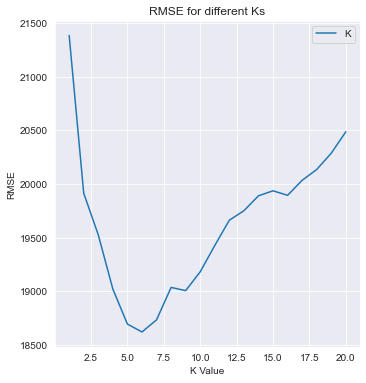

In [690]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for different Ks')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(np.arange(len(KNN_rmse_val))+1, np.array(KNN_rmse_val),
         label='K')
plt.legend(loc='upper right')
plt.xlabel('K Value')
plt.ylabel('RMSE')

In [691]:
print('K = 6, RMSE has smallest value')

K = 6, RMSE has smallest value


In [692]:
# K-Nearest Neighbour(KNN) Regression in Python
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors = 6)

In [693]:
#Printing all the parameters of KNN
print(RegModel)

#Creating the model on Training Data
KNN = RegModel.fit(X_n, y_new)
prediction = KNN.predict(X_n)
RMSE_KNN = sqrt(mean_squared_error(y_new,prediction)) #calculate rmse
print('REMS_KNN_fit:', RMSE_KNN)

print('KNN R2:',r2_score(y_new, prediction))

KNeighborsRegressor(n_neighbors=6)
REMS_KNN_fit: 16851.56267676475
KNN R2: 0.9736731851547662


In [694]:
print("RMSE (normalized):", RMSE_KNN/np.mean(y_new))

RMSE (normalized): 0.07682885798180594


In [695]:
#Cross Validation

from sklearn.preprocessing import normalize
X_n = normalize(X_new - np.mean(X_new, axis = 0), axis=0)

from sklearn.model_selection import KFold
KNN_MSE_10fold = []
KNN_R2_10fold = []
mse = 0
cv_10fold = KFold(n_splits = 10, random_state = 9, shuffle = True)

for train, test in cv_10fold.split(X_n):
    x_train_10fold, x_test_10fold = X_n[train], X_n[test]
    y_train_10fold, y_test_10fold = y_new[train], y_new[test]
    knn = KNeighborsRegressor(n_neighbors = 6)
    knn.fit(x_train_10fold,y_train_10fold)
    fitted_y_10fold = knn.predict(x_test_10fold)
    KNN_R2_10fold.append(r2_score(y_test_10fold, fitted_y_10fold))
    mse = np.array(np.mean((y_test_10fold-fitted_y_10fold)**2))
    KNN_MSE_10fold.append(mse.reshape(-1,1))
KNN_RMSE_test_l = math.sqrt(np.mean(KNN_MSE_10fold))
KNN_R2_test_l = np.mean(KNN_R2_10fold)
print("Estimated RMSE via 10-fold CV =",KNN_RMSE_test_l)
print("Estimated R2_full via 10-fold CV test =",KNN_R2_test_l)

Estimated RMSE via 10-fold CV = 18601.933898617863
Estimated R2_full via 10-fold CV test = 0.9677489347821698


In [696]:
print("RMSE (normalized):", KNN_RMSE_test_l/np.mean(y_new))

RMSE (normalized): 0.08480906875505458


In [697]:
result_df = result_df.append({'Model':'KNN Regression', 'Best λ':6, 'RMSEfit':RMSE_KNN,'R^2fit':r2_score(y_new, prediction),'E(RMSE test)':KNN_RMSE_test_l,'E(R^2 test)':KNN_R2_test_l}, ignore_index = True)
result_df

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,44817.903715,0.813782,44893.947386,0.812610
1,KNN Regression,6,16851.562677,0.973673,18601.933899,0.967749


In [698]:
result_normalized = result_normalized.append({'Model':'KNN Regression', 'Best λ':6, 'RMSEfit':RMSE_KNN/np.mean(y_new),'R^2fit':r2_score(y_new, prediction),'E(RMSE test)':KNN_RMSE_test_l/np.mean(y_new),'E(R^2 test)':KNN_R2_test_l}, ignore_index = True)
result_normalized

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,0.204332,0.813782,0.204678,0.812610
1,KNN Regression,6,0.076829,0.973673,0.084809,0.967749


In [699]:
# Lasso regression model

#from sklearn.linear_model import LassoCV
#lambdas = 10**np.linspace(-2,10,1000)
#reg = LassoCV(alphas=lambdas)
#reg.fit(X_new,y_new)
#y = (X_new.dot(reg.coef_.T)) + reg.intercept_
#print('Lasso R2:', reg.score(X_new, y_new))
#RMSE_lasso = np.sqrt(mean_squared_error(y_new, y))
#print('Lasso RMSE:', RMSE_lasso)
# #3print('Best lambda = ', reg.alpha_)

In [700]:
# Lasso regression model

from sklearn.linear_model import LassoCV
lambdas = 10**np.linspace(10,-100,1000)
reg = LassoCV(alphas=lambdas)
reg.fit(X_n,y_new)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23557129601.134766, tolerance: 4940603431.448569
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58370263207.56836, tolerance: 4940603431.448569
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79315127019.76367, tolerance: 4940603431.448569
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: C

LassoCV(alphas=array([1.00000000e+010, 7.76050334e+009, 6.02254120e+009, 4.67379511e+009,
       3.62710025e+009, 2.81481236e+009, 2.18443607e+009, 1.69523234e+009,
       1.31558562e+009, 1.02096066e+009, 7.92316862e+008, 6.14877765e+008,
       4.77176095e+008, 3.70312668e+008, 2.87381269e+008, 2.23022330e+008,
       1.73076553e+008, 1.34316117e+008, 1.04236067e+008, 8.08924349e+007,
       6.277660...
       3.40825855e-098, 2.64498018e-098, 2.05263775e-098, 1.59295021e-098,
       1.23620954e-098, 9.59360829e-099, 7.44512291e-099, 5.77779012e-099,
       4.48385595e-099, 3.47969790e-099, 2.70042072e-099, 2.09566240e-099,
       1.62633950e-099, 1.26212131e-099, 9.79469667e-100, 7.60117762e-100,
       5.89889643e-100, 4.57784054e-100, 3.55263468e-100, 2.75702333e-100,
       2.13958887e-100, 1.66042866e-100, 1.28857621e-100, 1.00000000e-100]))

In [701]:
y = (X_n.dot(reg.coef_.T)) + reg.intercept_
print('Lasso R2:', reg.score(X_n, y_new))
RMSE_lasso = np.sqrt(mean_squared_error(y_new, y))
print('Lasso RMSE:', RMSE_lasso)
print('Best lambda = ', reg.alpha_)

Lasso R2: 0.8137822660169418
Lasso RMSE: 44817.90371523941
Best lambda =  1.6114142772530233e-13


In [702]:
y = (X_n.dot(reg.coef_.T)) + reg.intercept_
print('Lasso R2:', reg.score(X_n, y_new))
RMSE_lasso = np.sqrt(mean_squared_error(y_new, y))
print('Lasso RMSE:', RMSE_lasso)
print('Best lambda = ', reg.alpha_)

Lasso R2: 0.8137822660169418
Lasso RMSE: 44817.90371523941
Best lambda =  1.6114142772530233e-13


Text(0, 0.5, 'RMSE')

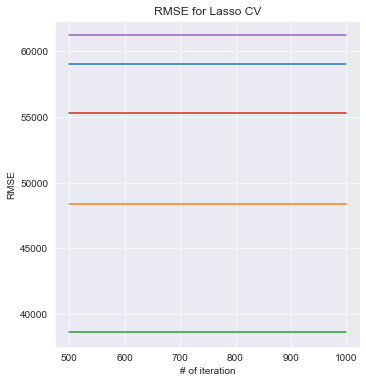

In [703]:
reg.mse_path_
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for Lasso CV')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(np.arange(len(lambdas[500:]))+500, np.array(np.sqrt(reg.mse_path_)[500:]))
plt.xlabel('# of iteration')
plt.ylabel('RMSE')

In [704]:
from sklearn.linear_model import Lasso
reg2 = Lasso(alpha=reg.alpha_)
reg2.fit(X_new, y_new)
y = (X_new.dot(reg2.coef_.T)) + reg2.intercept_
print('Lasso R2:', reg2.score(X_new, y_new))
RMSE_lasso2 = np.sqrt(mean_squared_error(y_new, y))
print('Lasso RMSE:', RMSE_lasso2)

Lasso R2: 0.8137822660169444
Lasso RMSE: 44817.9037152391


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5879330152410.226, tolerance: 6316596116.773318
  model = cd_fast.enet_coordinate_descent(


In [705]:
print("RMSE (normalized):", RMSE_lasso2/np.mean(y_new))

RMSE (normalized): 0.20433169466995815


In [707]:
#Cross Validation

from sklearn.preprocessing import normalize
X_n = normalize(X_new - np.mean(X_new, axis = 0), axis=0)

from sklearn.model_selection import KFold
MSE_10fold_lasso = []
full_R2_10fold_lasso = []
mse = 0
cv_10fold = KFold(n_splits=10, random_state=10, shuffle=True)
for train, test in cv_10fold.split(X_n):
    x_train_10fold, x_test_10fold = X_n[train], X_n[test]
    y_train_10fold, y_test_10fold = y_new[train], y_new[test]
    lasso = Lasso()
    lasso.fit(x_train_10fold,y_train_10fold)
    fitted_y_10fold = lasso.predict(x_test_10fold)
    full_R2_10fold_lasso.append(r2_score(y_test_10fold, fitted_y_10fold))
    mse = np.array(np.mean((y_test_10fold-fitted_y_10fold)**2))
    MSE_10fold_lasso.append(mse.reshape(-1,1))
RMSE_test_lasso = math.sqrt(np.mean(MSE_10fold_lasso))
R2_test_lasso = np.mean(full_R2_10fold_lasso)
print("Estimated RMSE via 10-fold CV =",RMSE_test_lasso)
print("Estimated R2_full via 10-fold CV test =",R2_test_lasso)

Estimated RMSE via 10-fold CV = 44894.38683040249
Estimated R2_full via 10-fold CV test = 0.8126064787718938


In [708]:
print("RMSE (normalized):", RMSE_test_lasso/np.mean(y_new))

RMSE (normalized): 0.20468039291863724


In [709]:
result_df = result_df.append({'Model':'Lasso Regression', 'Best λ':reg.alpha_, 'RMSEfit':RMSE_lasso2,'R^2fit':reg2.score(X_new, y_new),'E(RMSE test)':RMSE_test_lasso,'E(R^2 test)':R2_test_lasso}, ignore_index = True)
result_df

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,44817.903715,0.813782,44893.947386,0.812610
1,KNN Regression,6,16851.562677,0.973673,18601.933899,0.967749
2,Lasso Regression,0.0,44817.903715,0.813782,44894.386830,0.812606


In [710]:
result_normalized = result_normalized.append({'Model':'Lasso Regression', 'Best λ':reg.alpha_, 'RMSEfit':RMSE_lasso2/np.mean(y_new),'R^2fit':reg2.score(X_new, y_new),'E(RMSE test)':RMSE_test_lasso/np.mean(y_new),'E(R^2 test)':R2_test_lasso}, ignore_index = True)
result_normalized

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,0.204332,0.813782,0.204678,0.812610
1,KNN Regression,6,0.076829,0.973673,0.084809,0.967749
2,Lasso Regression,0.0,0.204332,0.813782,0.204680,0.812606


In [711]:
# Ridge regression model
from sklearn.linear_model import RidgeCV
lambdas = 10**np.linspace(10,-10,1000)
clf2 = RidgeCV(alphas=lambdas,store_cv_values=True, cv=None)
clf2.fit(X_n, y_new)
y = (X_n.dot(clf2.coef_.T)) + clf2.intercept_
#R2_lasso = r2_score(y_test, y)
print('Ridge R2:', clf2.score(X_n, y_new))
RMSE_ridge = np.sqrt(mean_squared_error(y_new, y))
print('Ridge RMSE:', RMSE_ridge)
print('best lambda = ', clf2.alpha_)

Ridge R2: 0.8137818349749012
Ridge RMSE: 44817.95558567376
best lambda =  0.0006711611767496273


In [712]:
from sklearn.linear_model import Ridge
RMSE_ridge = []
for i in lambdas:
    clf3 = Ridge(alpha=i)
    clf3.fit(X_new, y_new)
    y = (X_new.dot(clf3.coef_.T)) + clf3.intercept_
    RMSE_ridge.append(np.sqrt(mean_squared_error(y_new, y)))

min(RMSE_ridge)

44817.903715238805

In [750]:
#RMSE_ridge

Text(0, 0.5, 'RMSE')

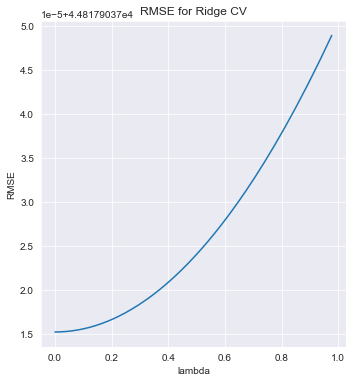

In [714]:
reg.mse_path_
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for Ridge CV')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(lambdas[500:], RMSE_ridge[500:])
plt.xlabel('lambda')
plt.ylabel('RMSE')

Text(0, 0.5, 'RMSE')

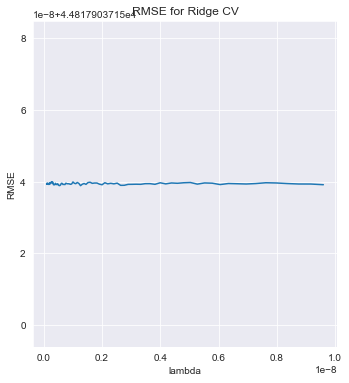

In [715]:
reg.mse_path_
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for Ridge CV')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(lambdas[900:], RMSE_ridge[900:])
plt.xlabel('lambda')
plt.ylabel('RMSE')

In [716]:
lambdas = 10**np.linspace(10,-10,1000)
clf4 = Ridge(alpha=clf2.alpha_)
clf4.fit(X_n, y_new)
y = (X_n.dot(clf4.coef_.T)) + clf4.intercept_
#R2_lasso = r2_score(y_test, y)
print('Ridge R2:', clf4.score(X_n, y_new))
RMSE_ridge = np.sqrt(mean_squared_error(y_new, y))
print('Ridge RMSE:', RMSE_ridge)

Ridge R2: 0.8137818349749
Ridge RMSE: 44817.95558567391


In [717]:
print("RMSE (normalized):", RMSE_ridge/np.mean(y_new))

RMSE (normalized): 0.20433193115522338


In [718]:
#Cross Validation
from sklearn.linear_model import Ridge
from sklearn.preprocessing import normalize
X_n = normalize(X_new - np.mean(X_new, axis = 0), axis=0)

from sklearn.model_selection import KFold
MSE_10fold_ridge = []
full_R2_10fold_ridge = []
mse = 0
cv_10fold = KFold(n_splits=10, random_state=10, shuffle=True)
for train, test in cv_10fold.split(X_n):
    x_train_10fold, x_test_10fold = X_n[train], X_n[test]
    y_train_10fold, y_test_10fold = y_new[train], y_new[test]
    ridge = Ridge(alpha=clf2.alpha_)
    ridge.fit(x_train_10fold,y_train_10fold)
    fitted_y_10fold = ridge.predict(x_test_10fold)
    full_R2_10fold_ridge.append(r2_score(y_test_10fold, fitted_y_10fold))
    mse = np.array(np.mean((y_test_10fold-fitted_y_10fold)**2))
    MSE_10fold_ridge.append(mse.reshape(-1,1))
RMSE_test_r = math.sqrt(np.mean(MSE_10fold_ridge))
R2_test_r = np.mean(full_R2_10fold_ridge)
print("Estimated RMSE via 10-fold CV =",RMSE_test_r)
print("Estimated R2_full via 10-fold CV test =",R2_test_r)

Estimated RMSE via 10-fold CV = 44893.861264358486
Estimated R2_full via 10-fold CV test = 0.8126101368241899


In [732]:
print("RMSE (normalized):", RMSE_test_r/np.mean(y_new))

RMSE (normalized): 0.20467799678246107


In [719]:
result_df = result_df.append({'Model':'Ridge Regression', 'Best λ':clf2.alpha_, 'RMSEfit':RMSE_ridge,'R^2fit':clf4.score(X_n, y_new),'E(RMSE test)':RMSE_test_r,'E(R^2 test)':R2_test_r}, ignore_index = True)
result_df

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,44817.903715,0.813782,44893.947386,0.812610
1,KNN Regression,6,16851.562677,0.973673,18601.933899,0.967749
2,Lasso Regression,0.0,44817.903715,0.813782,44894.386830,0.812606
3,Ridge Regression,0.000671,44817.955586,0.813782,44893.861264,0.812610


In [720]:
result_normalized = result_normalized.append({'Model':'Ridge Regression', 'Best λ':clf2.alpha_, 'RMSEfit':RMSE_ridge/np.mean(y_new),'R^2fit':clf4.score(X_n, y_new),'E(RMSE test)':RMSE_test_r/np.mean(y_new),'E(R^2 test)':R2_test_r}, ignore_index = True)
result_normalized

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,0.204332,0.813782,0.204678,0.812610
1,KNN Regression,6,0.076829,0.973673,0.084809,0.967749
2,Lasso Regression,0.0,0.204332,0.813782,0.204680,0.812606
3,Ridge Regression,0.000671,0.204332,0.813782,0.204678,0.812610


In [722]:
from sklearn.tree import DecisionTreeRegressor
RMSE_trees = []
for i in range(1000):
    tree1 = DecisionTreeRegressor(max_leaf_nodes=i+2)
    tree1.fit(X_n, y_new)
    y = tree1.predict(X_n)
    RMSE_trees.append(np.sqrt(mean_squared_error(y_new, y)))
RMSE_trees

[80021.54941210417,
 70312.6418929192,
 64363.22129998421,
 58320.286735966794,
 52452.49789504437,
 48662.257348895015,
 46353.50911963391,
 44425.75795755383,
 42470.10810428256,
 41378.0655185711,
 40258.19879092282,
 39242.30557294104,
 38250.14947294829,
 37360.28081559889,
 36633.26860252158,
 35961.403434648375,
 35323.27167236791,
 34690.6322346367,
 34071.77636300982,
 33323.70862036833,
 32689.460723678014,
 32094.495608386245,
 31505.278283792137,
 31024.44874945006,
 30608.32460014611,
 30222.821355261396,
 29846.471483549183,
 29492.713581947653,
 29164.197529537287,
 28832.855991610002,
 28516.077168696997,
 28010.092868343578,
 27700.70654422802,
 27395.030032533417,
 27097.73099264004,
 26780.32821314537,
 26484.037203533062,
 26191.610914803652,
 25911.026409242557,
 25635.239408130838,
 25371.879438335865,
 25144.672254578883,
 24929.973476848543,
 24734.363501108197,
 24545.866373824538,
 24330.835141808195,
 24139.974165265223,
 23961.332867698253,
 23783.8915619530

In [723]:
RMSE_trees.index(min(RMSE_trees))+2

793

Text(0, 0.5, 'RMSE')

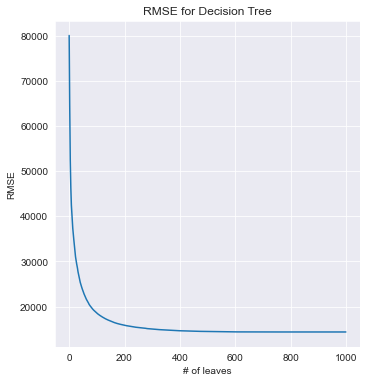

In [724]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for Decision Tree')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(np.arange(len(RMSE_trees)), RMSE_trees)
plt.xlabel('# of leaves')
plt.ylabel('RMSE')

In [725]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=793)
tree1.fit(X_n, y_new)
y = tree1.predict(X_n)
#R2_lasso = r2_score(y_test, y)
print('Decision Tree R2:', tree1.score(X_n, y_new))
RMSE_tree = np.sqrt(mean_squared_error(y_new, y))
print('Decision Tree RMSE:', RMSE_tree)
print('Depth of the tree', tree1.get_depth())

Decision Tree R2: 0.9808111734220597
Decision Tree RMSE: 14386.83389401382
Depth of the tree 17


In [726]:
print("RMSE (normalized):", RMSE_tree/np.mean(y_new))

RMSE (normalized): 0.06559178156071313


In [727]:
#Cross Validation

MSE_10fold_tree = []
full_R2_10fold_tree = []
mse = 0
cv_10fold = KFold(n_splits=10, random_state=10, shuffle=True)
for train, test in cv_10fold.split(X_n):
    x_train_10fold, x_test_10fold = X_n[train], X_n[test]
    y_train_10fold, y_test_10fold = y_new[train], y_new[test]
    tree2 = DecisionTreeRegressor(max_leaf_nodes=793)
    tree2.fit(x_train_10fold,y_train_10fold)
    fitted_y_10fold = tree2.predict(x_test_10fold)
    full_R2_10fold_tree.append(r2_score(y_test_10fold, fitted_y_10fold))
    mse = np.array(np.mean((y_test_10fold-fitted_y_10fold)**2))
    MSE_10fold_tree.append(mse.reshape(-1,1))
RMSE_test_r_tree = math.sqrt(np.mean(MSE_10fold_tree))
R2_test_r_tree = np.mean(full_R2_10fold_tree)
print("Estimated RMSE via 10-fold CV =",RMSE_test_r_tree)
print("Estimated R2_full via 10-fold CV test =",R2_test_r_tree)

Estimated RMSE via 10-fold CV = 17772.20503132036
Estimated R2_full via 10-fold CV test = 0.9706331765057667


In [733]:
print("RMSE (normalized):", RMSE_test_r_tree/np.mean(y_new))

RMSE (normalized): 0.0810262076322164


In [728]:
result_df = result_df.append({'Model':'Decision Tree', 'Best λ':tree1.get_depth(), 'RMSEfit':RMSE_ridge,'R^2fit':tree1.score(X_n, y_new),'E(RMSE test)':RMSE_test_r_tree,'E(R^2 test)':R2_test_r_tree}, ignore_index = True)
result_df

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,44817.903715,0.813782,44893.947386,0.812610
1,KNN Regression,6,16851.562677,0.973673,18601.933899,0.967749
2,Lasso Regression,0.0,44817.903715,0.813782,44894.386830,0.812606
3,Ridge Regression,0.000671,44817.955586,0.813782,44893.861264,0.812610
4,Decision Tree,17,44817.955586,0.980811,17772.205031,0.970633


In [729]:
result_normalized = result_normalized.append({'Model':'Decision Tree', 'Best λ':tree1.get_depth(), 'RMSEfit':RMSE_tree/np.mean(y_new),'R^2fit':tree1.score(X_n, y_new),'E(RMSE test)':RMSE_test_r_tree/np.mean(y_new),'E(R^2 test)':R2_test_r_tree}, ignore_index = True)
result_normalized

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,0.204332,0.813782,0.204678,0.812610
1,KNN Regression,6,0.076829,0.973673,0.084809,0.967749
2,Lasso Regression,0.0,0.204332,0.813782,0.204680,0.812606
3,Ridge Regression,0.000671,0.204332,0.813782,0.204678,0.812610
4,Decision Tree,17,0.065592,0.980811,0.081026,0.970633


In [740]:
from sklearn.ensemble import RandomForestRegressor
RMSE_forest = []
for i in range(50):
    tree2 = RandomForestRegressor(max_depth=i+1)
    tree2.fit(X_n, y_new)
    y = tree2.predict(X_n)
    RMSE_forest.append(np.sqrt(mean_squared_error(y_new, y)))
#RMSE_forest

[79973.30274059877,
 61914.44871317636,
 44912.0196716887,
 34179.333654169786,
 28089.289631798358,
 22327.845127790166,
 19047.42040499651,
 16905.51469282367,
 15661.179358804977,
 15005.074385350508,
 14702.689776068664,
 14601.397854077955,
 14566.416622603356,
 14533.399528505659,
 14548.596433930834,
 14547.940023821977,
 14537.302214042276,
 14537.719317610989,
 14551.897762962824,
 14525.957395255133,
 14531.394179976482,
 14547.051908741498,
 14560.57457058928,
 14549.648655572704,
 14553.275044796937,
 14545.559470706905,
 14537.835140801953,
 14536.638835591253,
 14539.941901367567,
 14533.520478432349,
 14541.348322594346,
 14562.114683104717,
 14566.25570770245,
 14531.288026170956,
 14552.644768934297,
 14550.649472196617,
 14525.307120769052,
 14557.158076063362,
 14540.16709134931,
 14554.671582136843,
 14545.76611691315,
 14536.435633924943,
 14536.138421063648,
 14544.978233592996,
 14540.553196073126,
 14542.371786002454,
 14548.177384314838,
 14533.13513783211,
 14

In [741]:
min_depth = RMSE_forest.index(min(RMSE_forest))
min_depth

36

Text(0, 0.5, 'RMSE')

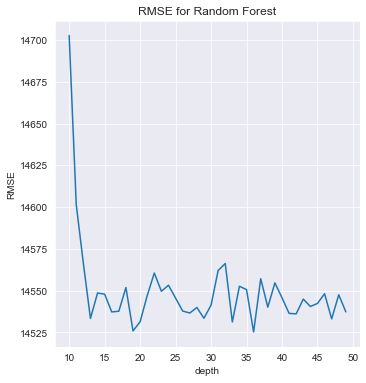

In [742]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('RMSE for Random Forest')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(np.arange(len(RMSE_forest[10:]))+10, RMSE_forest[10:])
plt.xlabel('depth')
plt.ylabel('RMSE')

In [743]:
tree3 = RandomForestRegressor(max_depth=min_depth)
tree3.fit(X_n, y_new)
y = tree3.predict(X_n)
#R2_lasso = r2_score(y_test, y)
print('Random Forest R2:', tree3.score(X_n, y_new))
RMSE_forest = np.sqrt(mean_squared_error(y_new, y))
print('Random Forest RMSE:', RMSE_forest)
#print('Depth of the tree', tree3.get_n_leaves())

Random Forest R2: 0.9803792640031437
Random Forest RMSE: 14547.845079539946


In [748]:
print("RMSE (normalized):", RMSE_forest/np.mean(y_new))

RMSE (normalized): 0.06632585624230485


In [744]:
#Cross Validation

MSE_10fold_forest = []
full_R2_10fold_forest = []
mse = 0
cv_10fold = KFold(n_splits=10, random_state=10, shuffle=True)
for train, test in cv_10fold.split(X_n):
    x_train_10fold, x_test_10fold = X_n[train], X_n[test]
    y_train_10fold, y_test_10fold = y_new[train], y_new[test]
    tree4 = RandomForestRegressor(max_depth=min_depth)
    tree4.fit(x_train_10fold,y_train_10fold)
    fitted_y_10fold = tree4.predict(x_test_10fold)
    full_R2_10fold_forest.append(r2_score(y_test_10fold, fitted_y_10fold))
    mse = np.array(np.mean((y_test_10fold-fitted_y_10fold)**2))
    MSE_10fold_forest.append(mse.reshape(-1,1))
RMSE_test_r_forest = math.sqrt(np.mean(MSE_10fold_tree))
R2_test_r_forest = np.mean(full_R2_10fold_tree)
print("Estimated RMSE via 10-fold CV =",RMSE_test_r_forest)
print("Estimated R2_full via 10-fold CV test =",R2_test_r_forest)

Estimated RMSE via 10-fold CV = 17772.20503132036
Estimated R2_full via 10-fold CV test = 0.9706331765057667


In [749]:
print("RMSE (normalized):", RMSE_test_r_forest/np.mean(y_new))

RMSE (normalized): 0.0810262076322164


In [745]:
result_df = result_df.append({'Model':'Random Forest', 'Best λ':min_depth, 'RMSEfit':RMSE_forest,'R^2fit':tree3.score(X_n, y_new),'E(RMSE test)':RMSE_test_r_forest,'E(R^2 test)':R2_test_r_forest}, ignore_index = True)
result_df

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,44817.903715,0.813782,44893.947386,0.812610
1,KNN Regression,6,16851.562677,0.973673,18601.933899,0.967749
2,Lasso Regression,0.0,44817.903715,0.813782,44894.386830,0.812606
3,Ridge Regression,0.000671,44817.955586,0.813782,44893.861264,0.812610
4,Decision Tree,17,44817.955586,0.980811,17772.205031,0.970633
5,Random Forest,36,14547.845080,0.980379,17772.205031,0.970633


In [746]:
result_normalized = result_normalized.append({'Model':'Random Forest', 'Best λ':min_depth, 'RMSEfit':RMSE_forest/np.mean(y_new),'R^2fit':tree3.score(X_n, y_new),'E(RMSE test)':RMSE_test_r_forest/np.mean(y_new),'E(R^2 test)':R2_test_r_forest}, ignore_index = True)
result_normalized

,Model,Best λ,RMSEfit,R^2fit,E(RMSE test),E(R^2 test)
0,Linear Regression,N/A,0.204332,0.813782,0.204678,0.812610
1,KNN Regression,6,0.076829,0.973673,0.084809,0.967749
2,Lasso Regression,0.0,0.204332,0.813782,0.204680,0.812606
3,Ridge Regression,0.000671,0.204332,0.813782,0.204678,0.812610
4,Decision Tree,17,0.065592,0.980811,0.081026,0.970633
5,Random Forest,36,0.066326,0.980379,0.081026,0.970633


<AxesSubplot:xlabel='Model'>

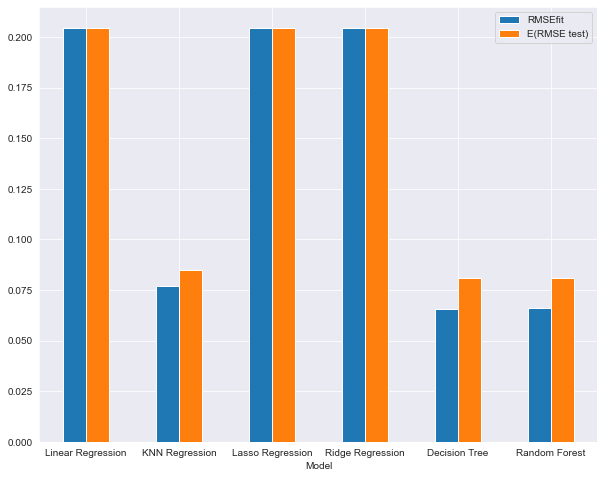

In [747]:
#index = 'Linear', 'KNN', 'Lasso','Ridge', 'Decision Tree', 'Random Forest'
rmse_df = result_normalized[['Model','RMSEfit','E(RMSE test)']]
rmse_df.set_index('Model', inplace=True)
#rmse_df.index.name = 'Linear', 'KNN', 'Lasso','Ridge', 'Decision Tree', 'Random Forest'
rmse_df.plot.bar(rot=0,figsize=(10, 8))